<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp1_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# URL do dataset no GitHub
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"

# Carregar o dataset para um DataFrame do Pandas
try:
    df_titanic = pd.read_csv(url)
    print("dataset carregado com sucesso!")
    print("informacoes iniciais do DataFrame:")
    print(df_titanic.info())
    print("primeiras 5 linhas do DataFrame:")
    print(df_titanic.head())
except Exception as e:
    print(f"erro ao carregar o dataset: {e}")
    exit()


dataset carregado com sucesso!
informacoes iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
primeiras 5 linhas do DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3

1-Carregue o dataset disponível em 'https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv' para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:
Elimine as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”;
Elimine observações que contenham dados ausentes (NA);
Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;
Separe o dataframe resultante em Treino-Teste, utilizando a proporção 80-20%.
carregamento e limpeza
dataset carregado com sucesso!
dimensoes do conjunto de treino: (569, 7) (569,)
dimensoes do conjunto de teste: (143, 7) (143,)
Engenharia de Features
analise descritiva do dataset
informacoes do dataframe:
<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Sex         712 non

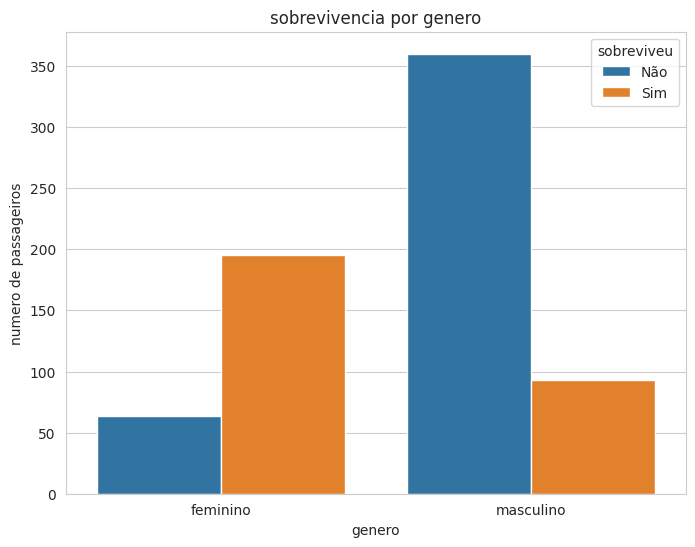

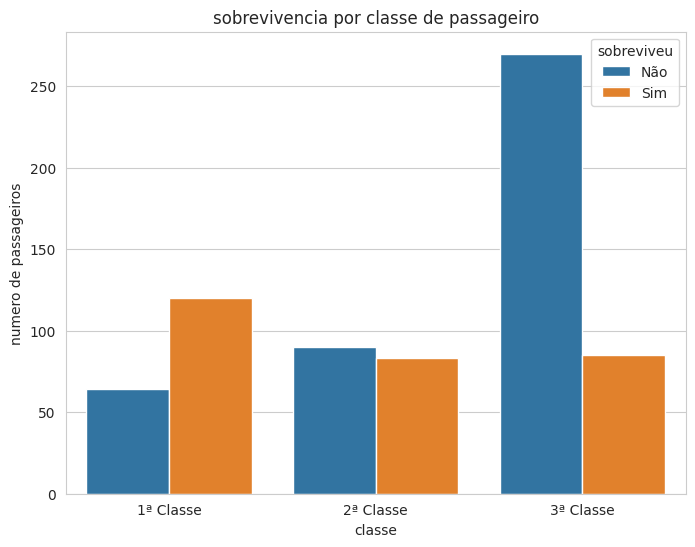

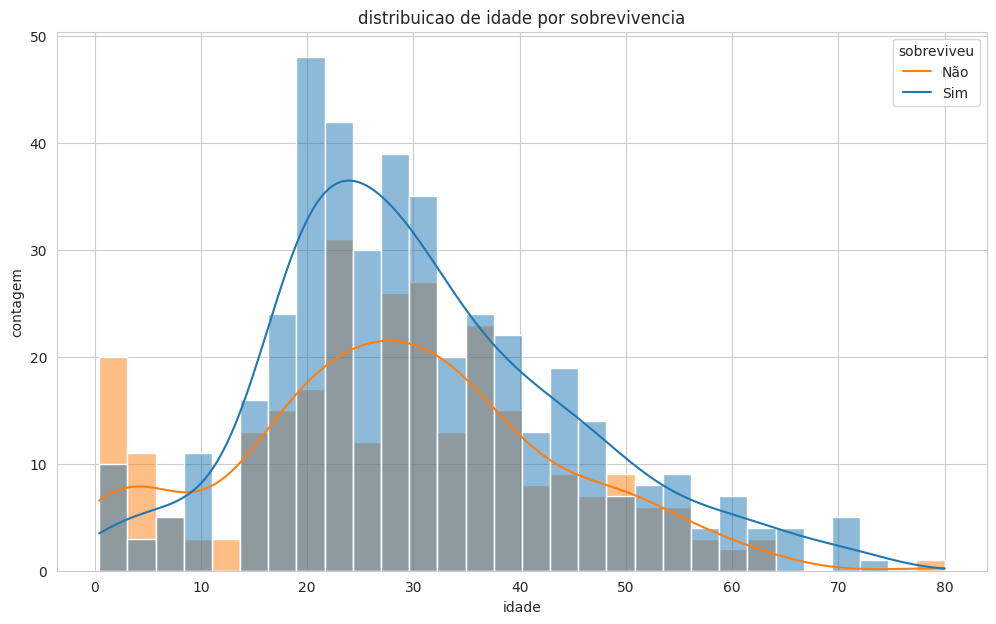

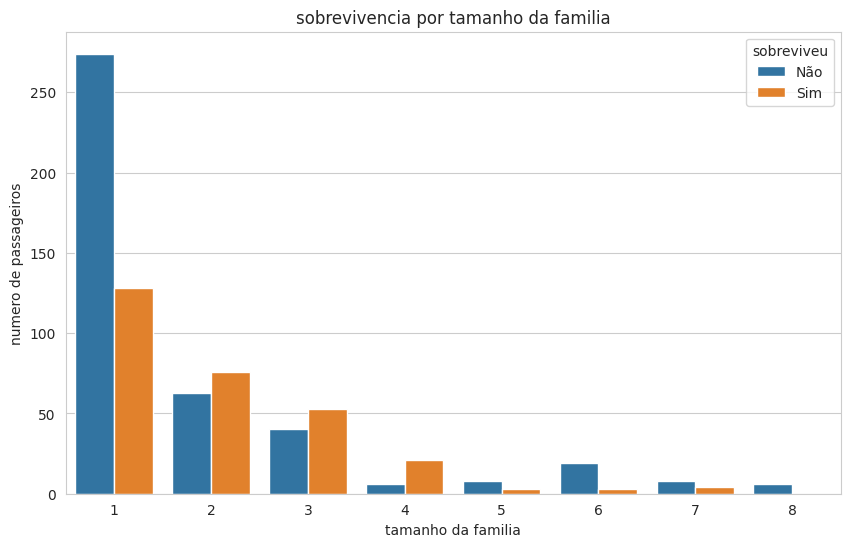

In [11]:
print("1-Carregue o dataset disponível em 'https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv' para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:")
print("Elimine as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”;")
print("Elimine observações que contenham dados ausentes (NA);")
print("Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;")
print("Separe o dataframe resultante em Treino-Teste, utilizando a proporção 80-20%.")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#configuracoes para melhor visualizacao dos graficos
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

#carregamento e limpeza de dados
print("carregamento e limpeza")
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"
try:
    df = pd.read_csv(url)
    print("dataset carregado com sucesso!")
except Exception as e:
    print(f"erro ao carregar o dataset: {e}")
    exit()

#remover as colunas especificadas: PassengerId, Name, Ticket e Cabin
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#eliminar observacoes com dados ausentes (NA)
df.dropna(inplace=True)

# Aplicar LabelEncoder nas variáveis categóricas Embarked e Sex
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Dividir o dataframe em treino e teste (80-20%)
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("dimensoes do conjunto de treino:", X_train.shape, y_train.shape)
print("dimensoes do conjunto de teste:", X_test.shape, y_test.shape)

#engenharia de features
print("Engenharia de Features")
#criar coluna FamilySize [tamanho da Familia]
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#criar coluna IsAlone [sozinho]
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

#analise descritiva e principais pontos
print("analise descritiva do dataset")

#informacoes gerais do dataframe
print("informacoes do dataframe:")
df.info()

#estatisticas descritivas das colunas numericas
print("estatisticas das colunas numericas:")
print(df.describe())

#contagem de sobreviventes
print("contagem de sobreviventes:")
print(df['Survived'].value_counts())
print("sobreviventes [1]:", df['Survived'].value_counts()[1], f"({df['Survived'].mean() * 100:.2f}%)")
print("nao-sobreviventes [0]:", df['Survived'].value_counts()[0], f"({(1 - df['Survived'].mean()) * 100:.2f}%)")

#distribuicao por Classe
print("distribuicao por classe [Pclass]:")
print(df['Pclass'].value_counts())

#distribuicao por genero
print("distribuicao por genero [Sex]:")
print(df['Sex'].value_counts())

#visualizacao grafica para analise
print("visualizacao grafica para analise")

#grafico 1:sobrevivencia por genero
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('sobrevivencia por genero')
plt.xlabel('genero')
plt.ylabel('numero de passageiros')
plt.xticks([0, 1], ['feminino', 'masculino'])
plt.legend(title='sobreviveu', labels=['Não', 'Sim'])
plt.show()

#grafico 2: sobrevivencia por classe
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('sobrevivencia por classe de passageiro')
plt.xlabel('classe')
plt.ylabel('numero de passageiros')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.legend(title='sobreviveu', labels=['Não', 'Sim'])
plt.show()

#grafico 3: distribuicao de idade por sobrevivencia
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('distribuicao de idade por sobrevivencia')
plt.xlabel('idade')
plt.ylabel('contagem')
plt.legend(title='sobreviveu', labels=['Não', 'Sim'])
plt.show()

#grafico 4: sobrevivencia por tamanho da familia
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('sobrevivencia por tamanho da familia')
plt.xlabel('tamanho da familia')
plt.ylabel('numero de passageiros')
plt.legend(title='sobreviveu', labels=['Não', 'Sim'])
plt.show()

Matriz de Confusão:
[[63 17]
 [25 38]]


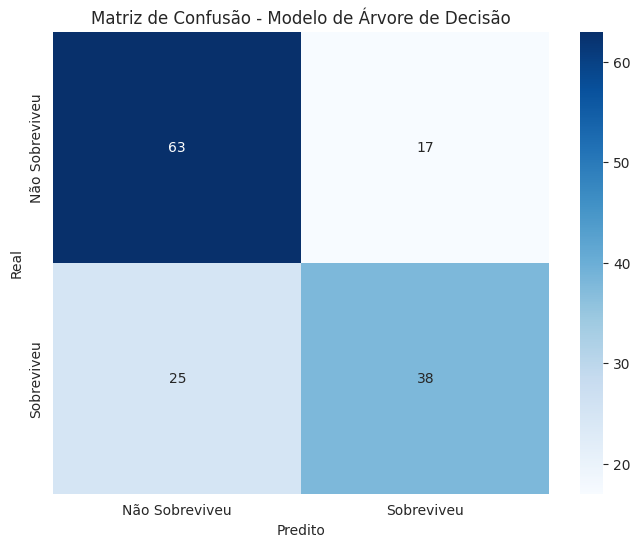

valores da Matriz de Confusao:
tb (Verdadeiro Negativo): 63
tp (Verdadeiro Positivo): 38
fn (Falso Negativo): 25
fp (Falso Positivo): 17
acuracia do modelo: 0.7063
metricas do modelo:
precision: 0.6909
recall: 0.6032
f1-score: 0.6441


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#treinar o modelo de arvore de decisao com parametros default
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#previsoes no conjunto de teste
y_pred = dt_model.predict(X_test)

#a-matriz de confusao
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)
#criar o grafico da matriz de confusao
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão - Modelo de Árvore de Decisão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

#b-valores de TN, TP, FN, FP
tn, fp, fn, tp = conf_matrix.ravel()
print("valores da Matriz de Confusao:")
print(f"tb (Verdadeiro Negativo): {tn}")
print(f"tp (Verdadeiro Positivo): {tp}")
print(f"fn (Falso Negativo): {fn}")
print(f"fp (Falso Positivo): {fp}")

#c-Acuracia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"acuracia do modelo: {accuracy:.4f}")

#d-Metricas precision, recall e F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("metricas do modelo:")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1-score: {f1:.4f}")




Experimente duas novas profundidades na execução de sua árvore de decisão e apresente a conclusão do impacto dessas alterações em sua árvore, a partir das novas métricas alcançadas.
dataset carregado com sucesso!
dimensoes do conjunto de treino: (569, 7) (569,)
dimensoes do conjunto de teste: (143, 7) (143,)
resultados para arvore de decisao com max_depth=3

Matriz de Confusão (max_depth=3):
[[69 11]
 [25 38]]


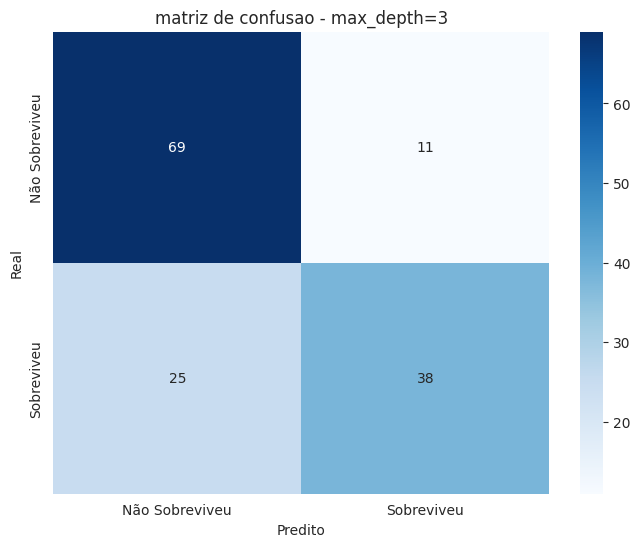

valores da matriz de confusao (max_depth=3):
verdadeiro negativo (TN): 69
verdadeiro positivo (TP): 38
falso negativo (FN): 25
falso positivo (FP): 11
metricas do Modelo (max_depth=3):
acuracia: 0.7483
precisao: 0.7755
recall: 0.6032
f1-score: 0.6786
resultados para arvore de decisao com max_depth=10

Matriz de Confusão (max_depth=10):
[[66 14]
 [28 35]]


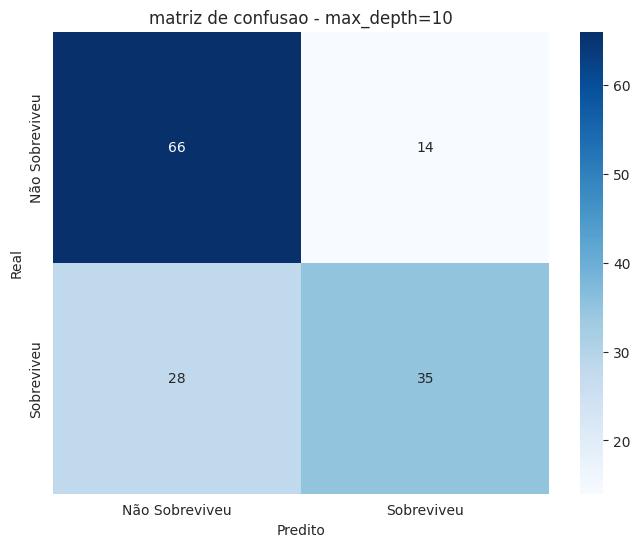

valores da matriz de confusao (max_depth=10):
verdadeiro negativo (TN): 66
verdadeiro positivo (TP): 35
falso negativo (FN): 28
falso positivo (FP): 14
metricas do Modelo (max_depth=10):
acuracia: 0.7063
precisao: 0.7143
recall: 0.5556
f1-score: 0.6250
Analise de Comparação
Vamos comparar o desempenho de dois modelos de arvore de decisao aplicados ao dataset do Titanic, utilizando diferentes profundidades maximas [max_depth=3 e max_depth=10].
As matrizes de confusao demonstrao previsoes no conjunto de teste [143 amostras], e as métricas associadas [acurácia, precisão, recall e F1-score] foram calculadas para avaliar o impacto das alteracoes na profundidade da arvore.
O objetivo eh analisar como essas mudancas afetam o desempenho do modelo e fornecer conclusoes baseadas nas metricas alcancadas.
Dados das Matrizes de Confusao
Matriz de Confusao [max_depth=3]:
verdadeiro negativo [TN]: 69
falso positivo [FP]: 11
falso negativo [FN]: 25
verdadeiro positivo [TP]: 38
Metricas:
acuracia: 0.74

In [13]:
print("Experimente duas novas profundidades na execução de sua árvore de decisão e apresente a conclusão do impacto dessas alterações em sua árvore, a partir das novas métricas alcançadas.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#configuracoes para visualizacao
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

#carregamento
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"
try:
    df = pd.read_csv(url)
    print("dataset carregado com sucesso!")
except Exception as e:
    print(f"erro ao carregar o dataset: {e}")
    exit()

#transformacoes no dataset
#reemover colunas especificadas
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#eliminar observacoes com valores ausentes
df.dropna(inplace=True)

#aplicar LabelEncoder em variaveis categoricas
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

#dividir em features [X] e target [y]
X = df.drop('Survived', axis=1)
y = df['Survived']

#divisao em treino e teste [80-20%]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("dimensoes do conjunto de treino:", X_train.shape, y_train.shape)
print("dimensoes do conjunto de teste:", X_test.shape, y_test.shape)

#funcao para avaliar o modelo e exibir metricas
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    #matriz de confusao
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusão ({model_name}):")
    print(conf_matrix)

    #visualizar matriz de confusao
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Sobreviveu', 'Sobreviveu'],
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.title(f'matriz de confusao - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

    #valores da matriz de confusao
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"valores da matriz de confusao ({model_name}):")
    print(f"verdadeiro negativo (TN): {tn}")
    print(f"verdadeiro positivo (TP): {tp}")
    print(f"falso negativo (FN): {fn}")
    print(f"falso positivo (FP): {fp}")

    #metricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"metricas do Modelo ({model_name}):")
    print(f"acuracia: {accuracy:.4f}")
    print(f"precisao: {precision:.4f}")
    print(f"recall: {recall:.4f}")
    print(f"f1-score: {f1:.4f}")

    return accuracy, precision, recall, f1

#treinar e avaliar modelo com max_depth=3
dt_model_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_depth3.fit(X_train, y_train)
print("resultados para arvore de decisao com max_depth=3")
metrics_depth3 = evaluate_model(dt_model_depth3, X_test, y_test, "max_depth=3")

#treinar e avaliar modelo com max_depth=10
dt_model_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model_depth10.fit(X_train, y_train)
print("resultados para arvore de decisao com max_depth=10")
metrics_depth10 = evaluate_model(dt_model_depth10, X_test, y_test, "max_depth=10")




print("Analise de Comparação")
print("Vamos comparar o desempenho de dois modelos de arvore de decisao aplicados ao dataset do Titanic, utilizando diferentes profundidades maximas [max_depth=3 e max_depth=10].")
print("As matrizes de confusao demonstrao previsoes no conjunto de teste [143 amostras], e as métricas associadas [acurácia, precisão, recall e F1-score] foram calculadas para avaliar o impacto das alteracoes na profundidade da arvore.")

print("O objetivo eh analisar como essas mudancas afetam o desempenho do modelo e fornecer conclusoes baseadas nas metricas alcancadas.")

print("Dados das Matrizes de Confusao")
print("Matriz de Confusao [max_depth=3]:")

print("verdadeiro negativo [TN]: 69")
print("falso positivo [FP]: 11")
print("falso negativo [FN]: 25")
print("verdadeiro positivo [TP]: 38")

print("Metricas:")
print("acuracia: 0.7483")
print("precisao: 0.7755")
print("recall: 0.6032")
print("f1-score: 0.6786")

print("Matriz de Confusão [max_depth=10]:")

print("verdadeiro negativo [TN]: 66")
print("falso positivo [FP]: 14")
print("falso negativo [FN]: 28")
print("verdadeiro positivo [TP]: 35")

print("Metricas:")
print("acuracia: 0.7063")
print("precisao: 0.7143")
print("recall: 0.5556")
print("f1-score: 0.6250")

print("analise comparativa|")

print("acuracia:")
print("max_depth=3: 0.7483 [74.83%]")
print("max_depth=10: 0.7063 [70.63%]")
print("observacao: O modelo com profundidade 3 apresenta uma acuracia [4.2%] maior, indicando que ele faz previsoes corretas em uma proporcao maior de casos totais. isso sugere que a árvore mais rasa generaliza melhor para o conjunto de teste.")

print("precisao:")

print("max_depth=3: 0.7755 [77.55%]")
print("max_depth=10: 0.7143 [71.43%]")
print("Observação: A precisao do modelo com profundidade 3 é 6.12% maior, mostrando uma maior confiabilidade nas previsoes positivas [sobreviventes]. O aumento de falsos positivos [d 11 p/14] no modelo com profundidade 10 contribui para essa reducao.")

print("Recall:")

print("max_depth=3: 0.6032 [60.32%]")
print("max_depth=10: 0.5556 [55.56%]")
print("Observação: O recall do modelo com profundidade 3 é 4.76% maior, indicando que ele identifica uma proporção ligeiramente maior de sobreviventes reais (38 TP vs. 35 TP). O aumento de falsos negativos (de 25 para 28) no modelo com profundidade 10 explica essa diferença.")


print("f1-score:")
print("max_depth=3: 0.6786")
print("max_depth=10: 0.6250")
print("observacao: o f1-score, que equilibra precisao e recall, é [5.36%] maior no modelo com profundidade 3. isso reforça que o modelo mais raso oferece um melhor equilibrio entre identificar sobreviventes e evitar previsoes positivas erradas.")

print("Matriz de Confusão:")

print("diferencas: O modelo com max_depth=3 tem 3 TN a mais (69 vs. 66) e 3 TP a mais (38 vs. 35), enquanto o modelo com max_depth=10 tem 3 FP a mais (14 vs. 11) e 3 FN a mais (28 vs. 25).")
print("isso indica que o modelo mais profundo tende a errar mais ao prever sobreviventes [aumentando FP e FN].")
print("interpretação: A arvore com profundidade 10 parece se ajustar excessivamente aos dados de treino, capturando ruidos que nao se generalizam ao teste, resultando em maior erro nas previsoes.")


print("Conclusao")

print("Impacto da Profundidade:")

print("max_depth=3: A restrição da profundidade a 3 níveis resulta em uma árvore mais simples, que evita overfitting e generaliza melhor para o conjunto de teste.")
print("isso eh evidenciado pela maior acuracia [0.7483], precisao [0.7755] e f1-score [0.6786], alem de um recall razoavel [0.6032]. A reducao de falsos positivos [11] em comparacao com o modelo mais profundo sugere maior controle nas previsoes positivas.")
print("max_depth=10: A profundidade maior permite que a arvore pegue mais detalhes dos dados de treino, mas isso leva a overfitting, como indicado pela queda em todas as metricas [acuracia 0.7063, precisão 0.7143, recall 0.5556, F1-score 0.6250].")
print("O aumento de falsos positivos [14] e falsos negativos [28] mostra que o modelo perde robustez ao prever tanto não sobreviventes quanto sobreviventes.")


print("Melhor Modelo:")
print("O modelo com max_depth=3 e superior para este dataset, oferecendo um desempenho mais equilibrado")
print("Ele e mais eficaz em cenarios onde a precisao nas previsoes positivas e importante, embora o recall indique que ainda tem espaço para melhorar a identificacao de sobreviventes.")


print("Implicacoes:")

print("Para o dataset do Titanic, uma profundidade limitada [como 3] foi mais adequada, pq o modelo evita ajuste dms e mantem um bom desempenho no conjunto de teste.")
print("Profundidades maiores [como 10] sao piores devido a complexidade excessiva.")
print("Se o objetivo for maximizar o recall [identificar mais sobreviventes], ajustes adicionais, como tuning de hiperparâmetros [exemplo.: min_samples_split] ou tecnicas como poda, poderiam ser explorados.")
print("alternativamente, a coleta de mais dados ou engenharia de features [como: FamilySize] poderia melhorar o desempenho.")


print("realizar validacao cruzada para confirmar a robustez do modelo com max_depth=3.")
print("testar profundidades intermediarias [exemplo.: 5 ou 7] para encontrar um ponto otimo entre complexidade e generalizacao.")
print("analisar a importancia das features para entender quais variaveis estao influenciando mais as previsoes e ajustar o modelo conforme necessario.")

Dataset carregado com sucesso!
Dimensões do conjunto de treino: (569, 7) (569,)
Dimensões do conjunto de teste: (143, 7) (143,)
resultados para arvore de decisão original
Matriz de Confusao (Original):
[[63 17]
 [25 38]]


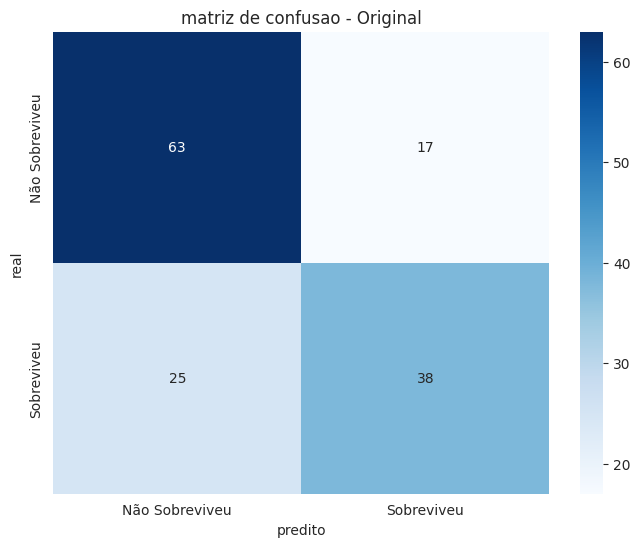

valores da matriz de confusao (Original):
verdadeiro Negativo [TN]: 63
verdadeiro Positivo [TP]: 38
falso Negativo [FN]: 25
falso Positivo [FP]: 17
metricas do modelo (Original):
acuracia: 0.7063
precisao: 0.6909
recall: 0.6032
f1-score: 0.6441
resultados para arvore de decisao [c/ max_depth=3]
Matriz de Confusao (max_depth=3):
[[69 11]
 [25 38]]


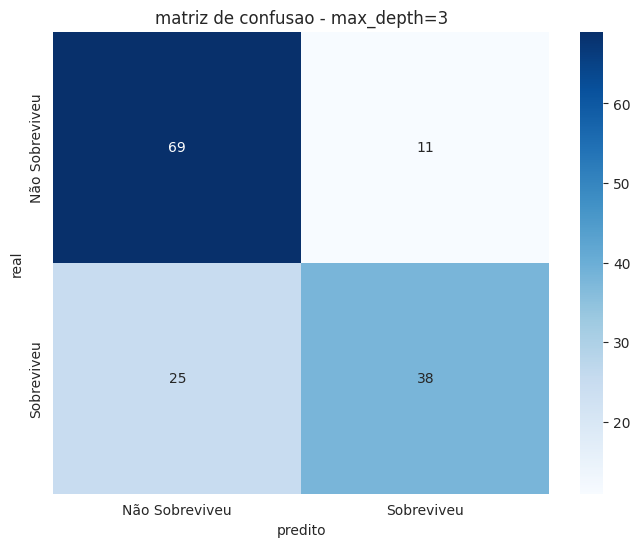

valores da matriz de confusao (max_depth=3):
verdadeiro Negativo [TN]: 69
verdadeiro Positivo [TP]: 38
falso Negativo [FN]: 25
falso Positivo [FP]: 11
metricas do modelo (max_depth=3):
acuracia: 0.7483
precisao: 0.7755
recall: 0.6032
f1-score: 0.6786
resultados para arvore de decisao com max_depth=10
Matriz de Confusao (max_depth=10):
[[66 14]
 [28 35]]


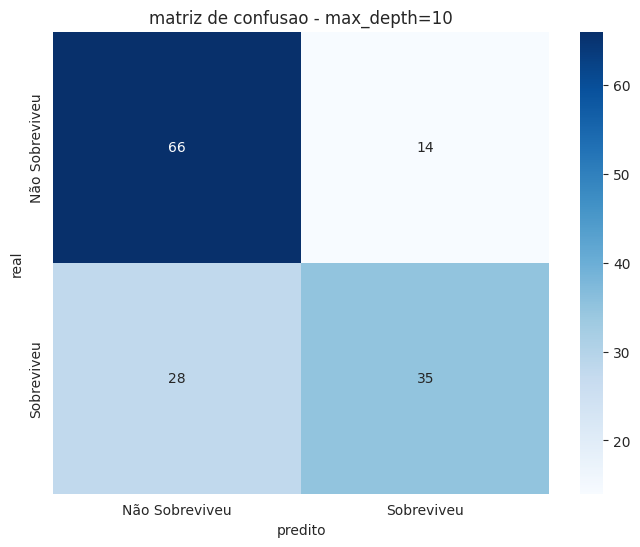

valores da matriz de confusao (max_depth=10):
verdadeiro Negativo [TN]: 66
verdadeiro Positivo [TP]: 35
falso Negativo [FN]: 28
falso Positivo [FP]: 14
metricas do modelo (max_depth=10):
acuracia: 0.7063
precisao: 0.7143
recall: 0.5556
f1-score: 0.6250


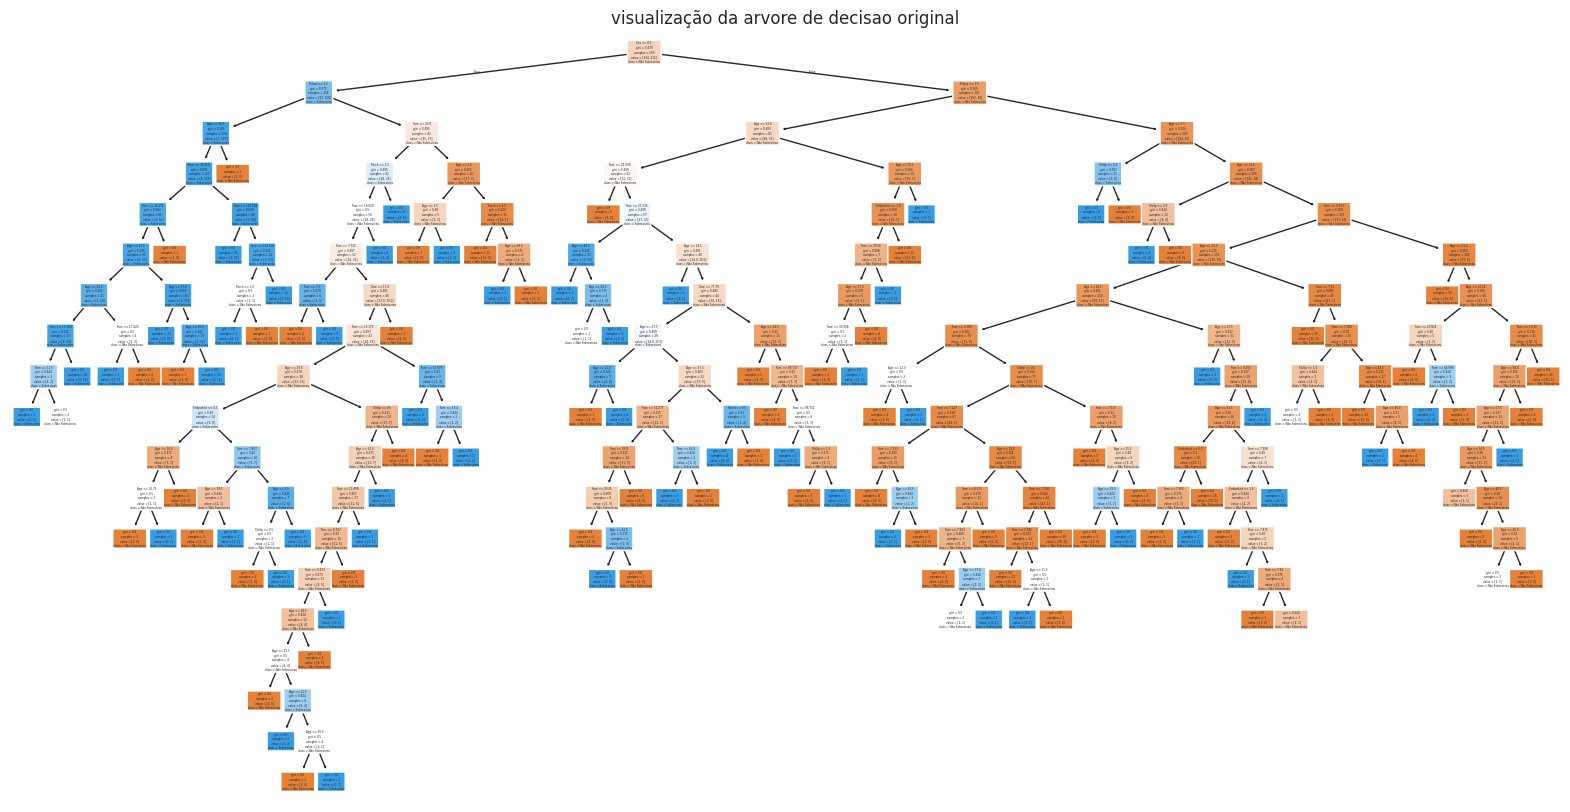

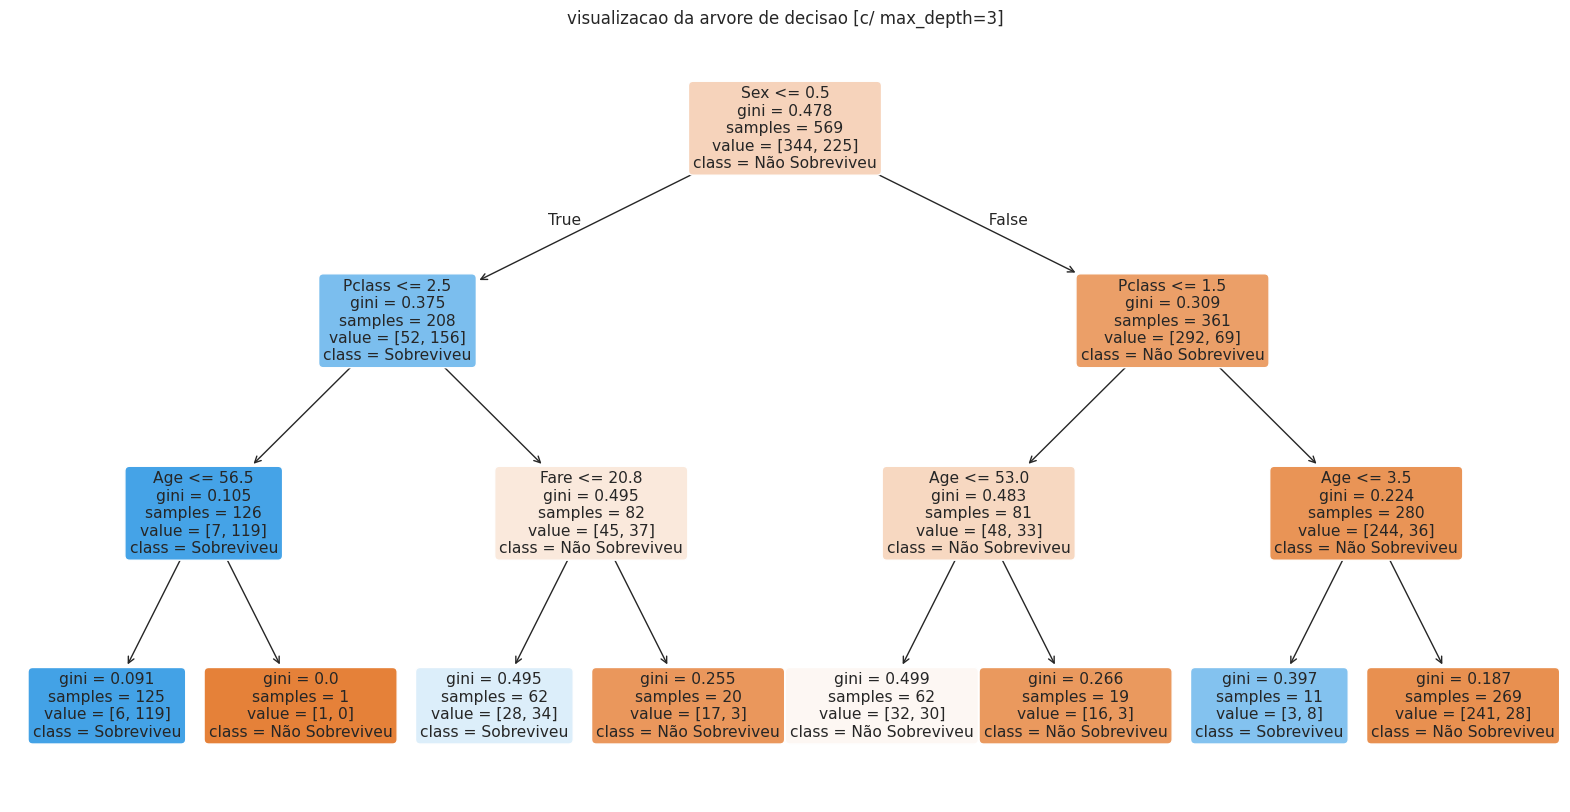

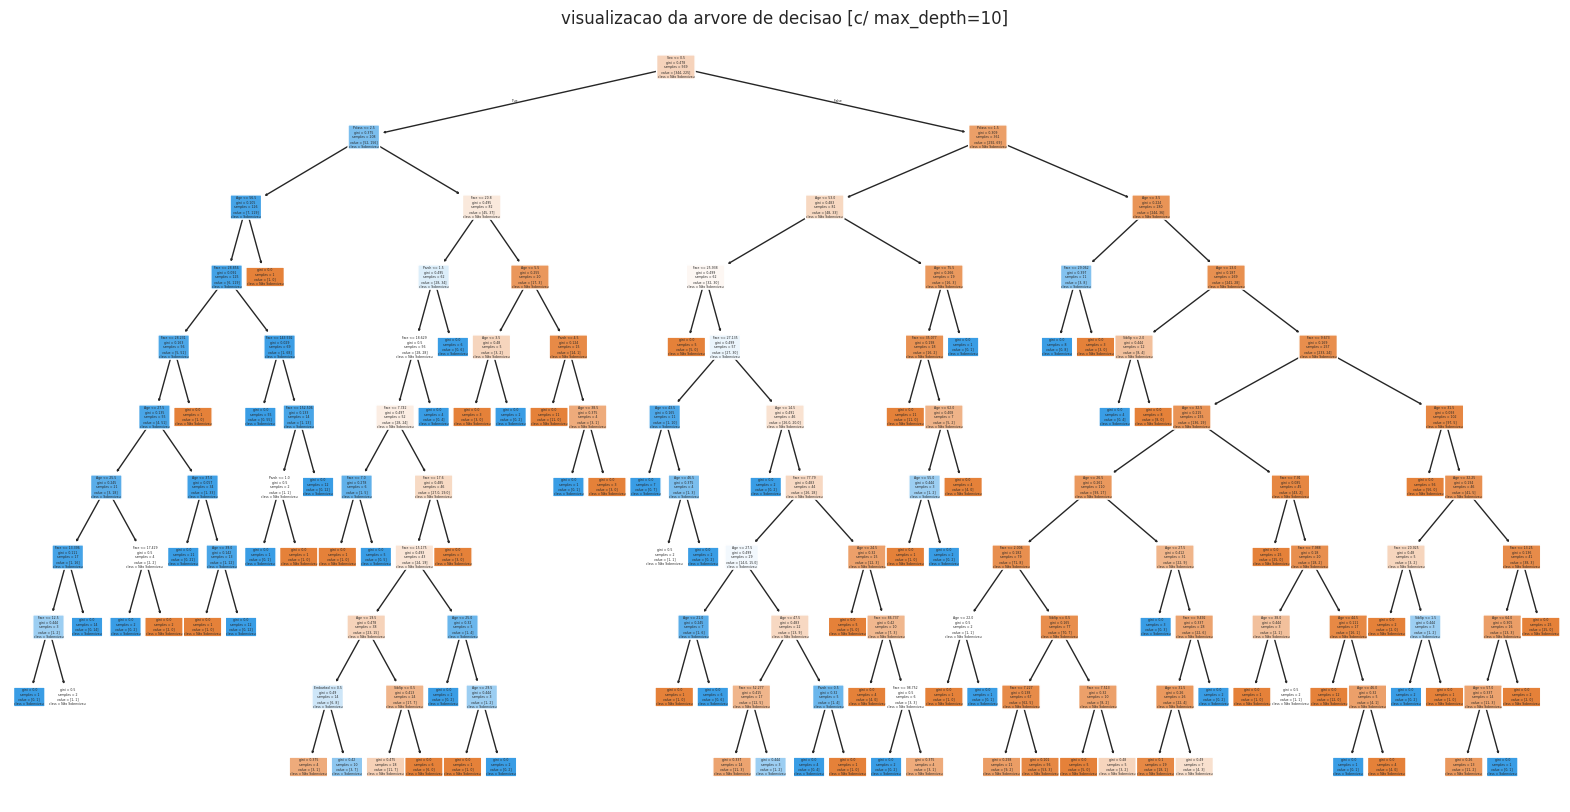

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#configuracoes para visualizacao
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

#carregamento
url = "https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv"
try:
    df = pd.read_csv(url)
    print("Dataset carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    exit()

#transformacoes
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

#divisao em features [X] e target [y]
X = df.drop('Survived', axis=1)
y = df['Survived']

#divisao em treino e teste [80-20%]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dimensões do conjunto de treino:", X_train.shape, y_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape, y_test.shape)

#funcao para avaliar o modelo e exibir metricas
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusao ({model_name}):")
    print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Sobreviveu', 'Sobreviveu'],
                yticklabels=['Não Sobreviveu', 'Sobreviveu'])
    plt.title(f'matriz de confusao - {model_name}')
    plt.xlabel('predito')
    plt.ylabel('real')
    plt.show()
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"valores da matriz de confusao ({model_name}):")
    print(f"verdadeiro Negativo [TN]: {tn}")
    print(f"verdadeiro Positivo [TP]: {tp}")
    print(f"falso Negativo [FN]: {fn}")
    print(f"falso Positivo [FP]: {fp}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"metricas do modelo ({model_name}):")
    print(f"acuracia: {accuracy:.4f}")
    print(f"precisao: {precision:.4f}")
    print(f"recall: {recall:.4f}")
    print(f"f1-score: {f1:.4f}")
    return accuracy, precision, recall, f1

#treinar e avaliar modelo original [s/ limite de profundidade]
dt_model_original = DecisionTreeClassifier(random_state=42)
dt_model_original.fit(X_train, y_train)
print("resultados para arvore de decisão original")
metrics_original = evaluate_model(dt_model_original, X_test, y_test, "Original")

#treinar e avaliar modelo com max_depth=3
dt_model_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_depth3.fit(X_train, y_train)
print("resultados para arvore de decisao [c/ max_depth=3]")
metrics_depth3 = evaluate_model(dt_model_depth3, X_test, y_test, "max_depth=3")

#treinar e avaliar modelo com max_depth=10
dt_model_depth10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model_depth10.fit(X_train, y_train)
print("resultados para arvore de decisao com max_depth=10")
metrics_depth10 = evaluate_model(dt_model_depth10, X_test, y_test, "max_depth=10")

#visualizacoes das arvores
plt.figure(figsize=(20,10))
plot_tree(dt_model_original, feature_names=X.columns, class_names=['Não Sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.title("visualização da arvore de decisao original")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dt_model_depth3, feature_names=X.columns, class_names=['Não Sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.title("visualizacao da arvore de decisao [c/ max_depth=3]")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(dt_model_depth10, feature_names=X.columns, class_names=['Não Sobreviveu', 'Sobreviveu'], filled=True, rounded=True)
plt.title("visualizacao da arvore de decisao [c/ max_depth=10]")
plt.show()